# Digital Epidemiology Final Project

**LEONARDO LAVAGNA 1650170**

**GROUP 14**

## PART 1 . Simulation of an epidemic on a given network using an SIR model

### Set up

In [1]:
#!pip install EoN

In [2]:
# LIBRARIES

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import EoN
import random
import numpy as np
import pandas as pd
import auxiliary_functions as AF

In [3]:
# GLOBAL PARAMETERS

#transmission rates
beta  = 0.005
betas = [10*beta,beta/10]

#recovery rate
gamma = 0.025

#times
t0   = 0
tmax = 100

#r0
r0 = beta/gamma
#print("Value of r_0:", r0)

#percentage of initial infected
rho = 0.1

### Graph creation

In [4]:
# GRAPH

g = nx.read_edgelist("edges-13.csv",delimiter=',',create_using=nx.Graph(),nodetype=int)

In [5]:
# CHECK

print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 5345
Number of edges: 25639
Average degree:   9.5936


In [6]:
# PLOT
# REMARK . This cell takes a minute ore two to run

spring_pos = nx.spring_layout(g)

### SIR simulation

In [7]:
# SIMULATION

sim = EoN.Gillespie_SIR(g,tau = beta, gamma = gamma,return_full_data=True)
t, S, I, R = EoN.Gillespie_SIR(g,tau = beta, gamma = gamma,rho = rho)

(<AxesSubplot:>,
 [<AxesSubplot:title={'center':'$S$'}>,
  <AxesSubplot:title={'center':'$I$'}>,
  <AxesSubplot:title={'center':'$R$'}, xlabel='$t$'>])

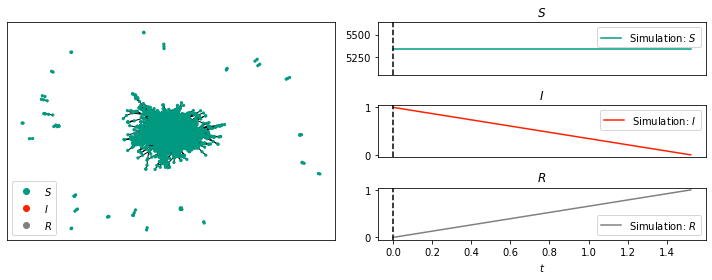

In [8]:
# PLOTS AT TIME t0

sim.display(time=t0,pos=spring_pos,node_size=5)

(<AxesSubplot:>,
 [<AxesSubplot:title={'center':'$S$'}>,
  <AxesSubplot:title={'center':'$I$'}>,
  <AxesSubplot:title={'center':'$R$'}, xlabel='$t$'>])

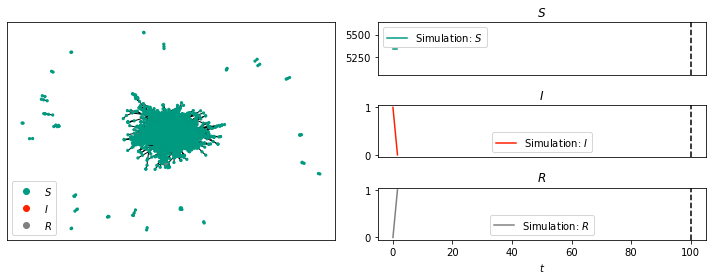

In [9]:
# PLOTS AT TIME tmax

sim.display(time=tmax,pos=spring_pos,node_size=5)

### SIR dynamics

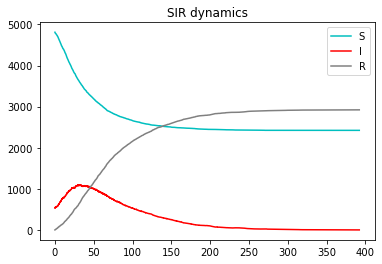

In [10]:
# PLOTS OF THE SIR DYNAMICS

fig, ax = plt.subplots()
ax.plot(t, S, label = "S",color="c")
ax.plot(t, I, label = "I",color="r")
ax.plot(t, R, label = "R",color="grey")
plt.title("SIR dynamics")
plt.legend(loc="best")
plt.show()

In [11]:
# EPIDEMIC SIZE

I.argmax()/g.order()

0.32591206735266604

### Analysis of the final epidemic size as beta changes when gamma is fixed 


In [12]:
# SIMULATION IN THE CASE r0>1

t1, S1, I1, R1 = EoN.Gillespie_SIR(g,tau = betas[0], gamma = gamma,rho = rho)

In [13]:
# SIMULATION IN THE CASE r0<1

t2, S2, I2, R2 = EoN.Gillespie_SIR(g,tau = betas[1], gamma = gamma,rho = rho)

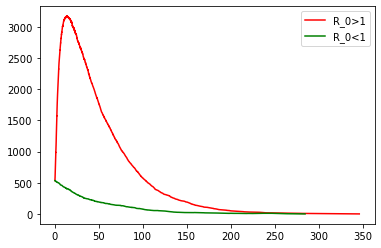

In [14]:
# PLOTS

plt.plot(t1, I1, color='r', label='R_0>1')
plt.plot(t2, I2, color='g', label='R_0<1')
plt.legend()
plt.show()

### Study of the epidemic threshold

**Reference**: Gabriel Fabricius, Alberto Maltz, Exploring the threshold of epidemic spreading for a stochastic SIR model with local and global contacts, Physica A: Statistical Mechanics and its Applications, Volume 540, 2020, 123208, ISSN 0378-4371, https://doi.org/10.1016/j.physa.2019.123208. 

**Online Version of the Reference**: https://www.sciencedirect.com/science/article/pii/S0378437119318035)

In [15]:
# SIMULATION

sim_thr = EoN.Gillespie_SIR(g, tau=gamma, gamma=gamma, return_full_data=True)
t_thr, S_thr, I_thr, R_thr = EoN.Gillespie_SIR(g, tau=gamma, gamma=gamma, rho=rho)

(<AxesSubplot:>,
 [<AxesSubplot:title={'center':'$S$'}>,
  <AxesSubplot:title={'center':'$I$'}>,
  <AxesSubplot:title={'center':'$R$'}, xlabel='$t$'>])

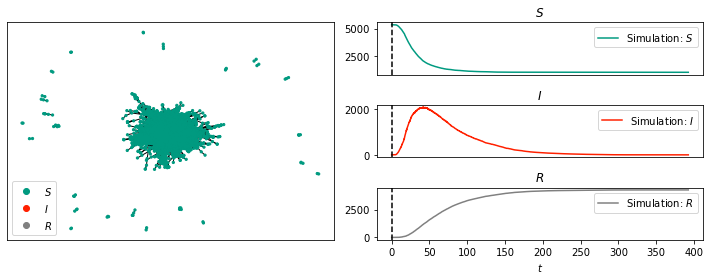

In [16]:
# PLOTS AT TIME t0

sim_thr.display(time=t0, pos=spring_pos,node_size=5)

(<AxesSubplot:>,
 [<AxesSubplot:title={'center':'$S$'}>,
  <AxesSubplot:title={'center':'$I$'}>,
  <AxesSubplot:title={'center':'$R$'}, xlabel='$t$'>])

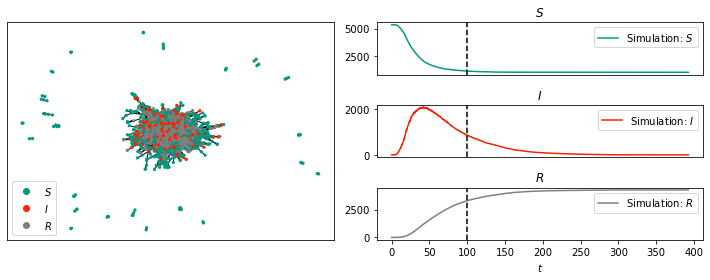

In [17]:
# PLOTS AT TIME tmax

sim_thr.display(time=tmax, pos=spring_pos,node_size=5)

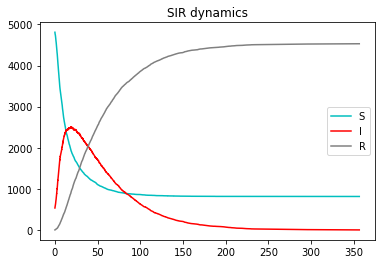

In [18]:
# PLOTS OF THE SIR DYNAMICS

fig, ax = plt.subplots()
ax.plot(t_thr, S_thr, label = "S",color="c")
ax.plot(t_thr, I_thr, label = "I",color="r")
ax.plot(t_thr, R_thr, label = "R",color="grey")
plt.title("SIR dynamics")
plt.legend(loc="best")
plt.show()

## SUPPLEMENT TO PART 1 . Equivalence of EoN.Gillespie_SIR and EoN.fast_SIR
**Reference**: https://arxiv.org/pdf/2001.02436.pdf

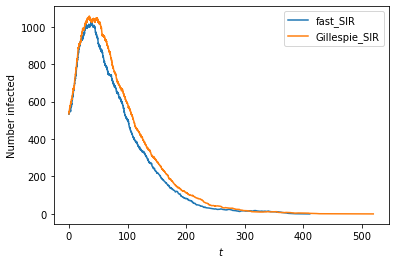

In [19]:
# EQUIVALENCE EoN.Gillespie_SIR AND EoN.fast_SIR

t_f, S_f, I_f, R_f = EoN.fast_SIR(g, tau=beta, gamma=gamma, rho=rho)
t_g, S_g, I_g, R_g = EoN.Gillespie_SIR(g, tau=beta, gamma=gamma, rho=rho)

plt.plot(t_f, I_f, label = 'fast_SIR')
plt.plot(t_g, I_g, label = 'Gillespie_SIR')
plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.show()

## PART 2 . Generate a random network by randomly rewiring a variable percentage of edges and repeat Part 1

### Graph creation

In [20]:
# PARAMETERS

#percentage of edges to rewire
p = 0.3

In [21]:
# EXAMPLE GRAPHS WITH 30% OF EDGES REMOVED

g_s = AF.edge_rewire(g,p)

Check :
Name: 
Type: Graph
Number of nodes: 5345
Number of edges: 25637
Average degree:   9.5929


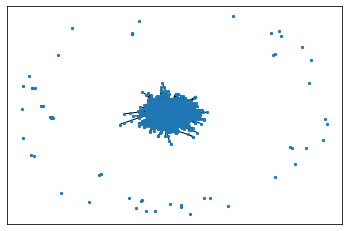

In [22]:
# PLOTS
# REMARK . This cell takes a minute ore two to run

spring_pos_gs = nx.spring_layout(g_s)
nx.draw_networkx(g_s,pos=spring_pos_gs,with_labels=False,node_size=5)

### Repeat Part 1 with the new graph

In [23]:
# SIR SIMULATION

t_s, S_s, I_s, R_s = EoN.Gillespie_SIR(g_s, tau=beta, gamma=gamma, rho=rho)

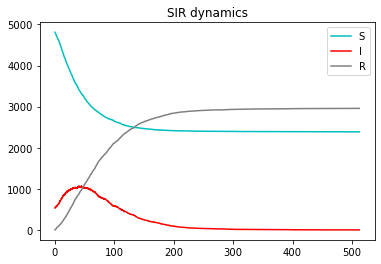

In [24]:
# PLOTS OF THE SIR DYNAMICS

fig, ax = plt.subplots()
ax.plot(t_s, S_s, label = "S",color="c")
ax.plot(t_s, I_s, label = "I",color="r")
ax.plot(t_s, R_s, label = "R",color="grey")
plt.title("SIR dynamics")
plt.legend(loc="best")
plt.show()

In [25]:
# EPIDEMIC SIZE

I_s.argmax()/g_s.order()

0.4280636108512629

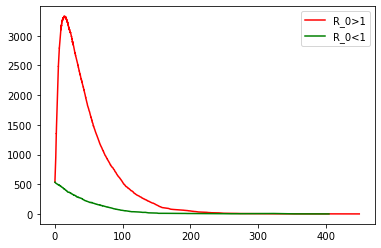

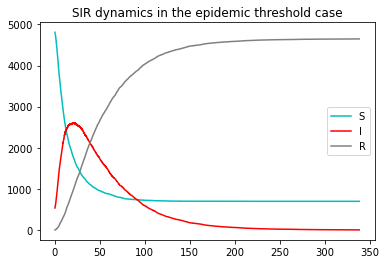

In [26]:
# ANALYSIS OF THE FINAL EPIDEMIC SIZE AS BETA CHANGES WHEN GAMMA IS FIXED 

#Simulation when r0>1
t3, S3, I3, R3 = EoN.Gillespie_SIR(g_s,tau = betas[0], gamma = gamma,rho = rho)

#Simulation when r0>1
t4, S4, I4, R4 = EoN.Gillespie_SIR(g_s,tau = betas[1], gamma = gamma,rho = rho)

#plots of the SIR dynamics
plt.plot(t3, I3, color='r', label='R_0>1')
plt.plot(t4, I4, color='g', label='R_0<1')
plt.legend()
plt.show()

#Simulation in the case of epidemic threshold
t5, S5, I5, R5 = EoN.Gillespie_SIR(g_s,tau=gamma, gamma = gamma,rho = rho)

#plots of the SIR dynamics
fig, ax = plt.subplots()
ax.plot(t5, S5, label = "S",color="c")
ax.plot(t5, I5, label = "I",color="r")
ax.plot(t5, R5, label = "R",color="grey")
plt.title("SIR dynamics in the epidemic threshold case")
plt.legend(loc="best")
plt.show()

## PART 3 . Repeat Part 1 with part of the population immunized
**Remark .** In this section and in the following one, we will use custom functions which are based on randomized algorithms. For this reason, sometimes, the output of some cells below will stay flat, meaning that the epidemic model remained stable with values constantly equal to some initial user defined parameters. In such cases re-run the interested cells a couple of times in order for the model simulation to show appropriate non trivial results. 

### Initial immunized choosen at random

In [47]:
# SIMULATION WITHOUT IMMUNIZATION

sir=AF.SIR(graph=g,beta=beta,gamma=gamma,recovery="")
sir.run(priority="",frac=0.3)
data=sir.getDataNormalized()

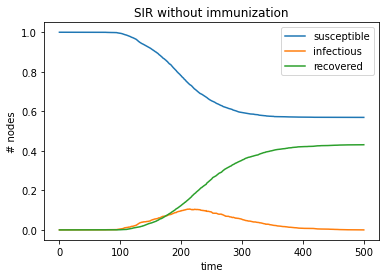

In [48]:
# PLOTS

AF.plot_sir(plt,data, title="SIR without immunization")

In [49]:
# SIMULATION WITH RANDOM IMMUNIZATION

sir = AF.SIR(graph=g,beta=beta,gamma=gamma,recovery="")
sir.run(priority="random", frac=0.3)
data_immunization=sir.getDataNormalized()

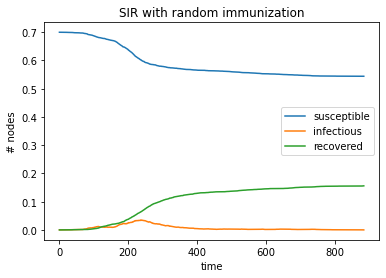

In [50]:
# PLOTS

AF.plot_sir(plt,data_immunization, title="SIR with random immunization")

### Initial immunized choosen following the closeness centrality

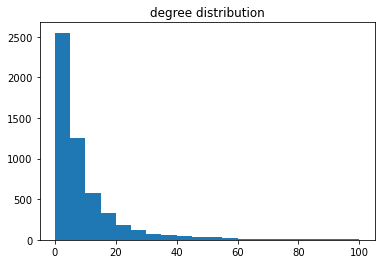

In [82]:
# DEGREE DISTRIBUTION
# REMARK . This cell takes a minute ore two to run

d=dict(g.degree())
degree=list(d.values())
plt.hist(degree,bins=20, range=(0,100))
plt.title("degree distribution")
plt.show()

In [80]:
# SIMULATION WITH CLOSENESS IMMUNIZATION
# REMARK . This cell takes a minute ore two to run

sir = AF.SIR(graph=g,beta=beta,gamma=gamma,recovery="")
sir.run(priority="degree", frac=0.3)
data_immunization=sir.getDataNormalized()

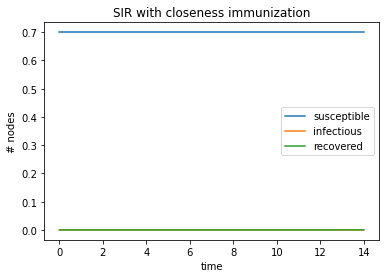

In [81]:
# PLOTS

AF.plot_sir(plt,data_immunization, title="SIR with closeness immunization")

## PART 4. Assign the recovery rate to each individual from a probability distribution and repeat Part 1.

In [59]:
# SIMULATION WITH UNIFORM RECOVERY

sir = AF.SIR(graph=g,beta=beta,gamma=gamma,recovery="uniform")
sir.run(priority="", frac=0.00)
data=sir.getDataNormalized()

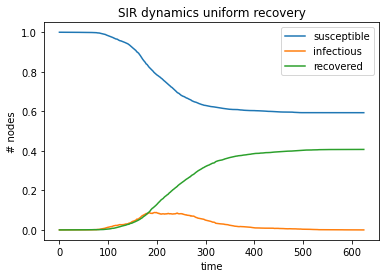

In [60]:
# PLOTS

AF.plot_sir(plt,data, title="SIR dynamics uniform recovery")

In [35]:
# SIMULATION WITH GAUSSIAN RECOVERY

sir = AF.SIR(graph=g,beta=beta,gamma=gamma,recovery="gaussian")
sir.run(priority="", frac=0.00)
data=sir.getDataNormalized()

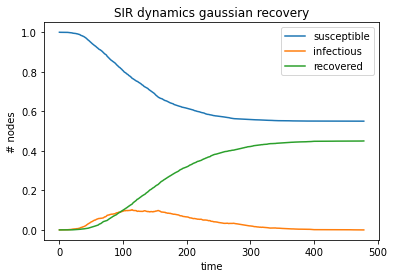

In [36]:
# PLOTS

AF.plot_sir(plt,data, title="SIR dynamics gaussian recovery")

In [37]:
# SIMULATION WITH POWER LAW RECOVERY WITH a=2

sir = AF.SIR(graph=g,beta=beta,gamma=gamma,recovery="power")
sir.run(priority="", frac=0.00)
data=sir.getDataNormalized()

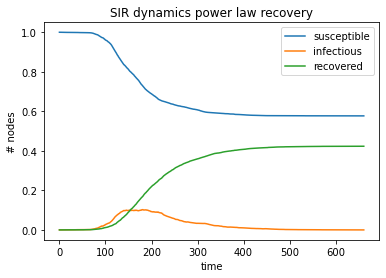

In [38]:
# PLOTS

AF.plot_sir(plt,data, title="SIR dynamics power law recovery")